<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Перцептрон и нейрон: решения</b></h2>

---

<h2 style="text-align: center;"><b>Перцептрон Розенблатта (нейрон с пороговой функцией активации)</b></h2>

В данном задании Вам нужно будет: 
- самостоятельно реализовать класс **`Perceptron()`** -- нейрон пороговой функцией активации
- обучить и протестировать Ваш перцептрон на сгенерированных и реальных данных (файлы с реальными данными помещены в папку /data в этой же директории)
- сравнить качество работы Вашего класса с классом из библиотеки `scikit-learn` (`sklearn.linear_model.Perceptron()`)

<h3 style="text-align: center;"><b>Введение</b></h3>

Почти любой алгоритм машинного обучения, решающий задачу *классификации* или *регрессии*, работает так:

1. (*стадия инициализации*) Задаются его **гиперпараметры**, то есть те величины, которые не "выучиваются" алгоритмом в процессе обучения самостоятельно 
2. (*стадия обучения*) Алгоритм запускается на данных, **обучаясь** на них и меняя свои **параметры** (не путать с *гипер*параметрами) каким-то определённым образом (например, с помощью *метода градиентного спуска*), исходя из функции потерь (её называют *loss function*). Функция потерь, по сути, говорит, где и как ошибается модель
3.  (*стадия предсказания*) Модель готова, и теперь с помощью неё можно делать **предсказания** на новых объектах

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap  # тут лежат разные штуки для цветовой магии
import numpy as np
import pandas as pd

<h3 style="text-align: center;"><b>Класс Perceptron</b></h3>

В даном разделе будет решаться задача **бинарной классификации** с помощью перцептрона:  
- *Входные данные*: матрица $X$ размера $(n, m)$ и столбец $y$ из нулей и единиц размера $(n, 1)$. Строкам матрицы соответствуют объекты, столбцам - признаки (то есть строка $i$ есть набор признаков (*признаковое описание*) объекта $x_i$).
- *Выходные данные*: столбец $\hat{y}$ из нулей и единиц размера $(n, 1)$ - предсказания алгоритма.

Модель нейрона в биологии и в deep learning:  

![title](http://lamda.nju.edu.cn/weixs/project/CNNTricks/imgs/neuron.png)

Чтобы понять, как мы будем обновлять параметры модели (веса), нужно знать, какую функцию потерь мы оптимизируем (находим минимум). В данном случае мы решаем задачу бинарной классификации (2 класса: 1 или 0), возьмём в качестве функции потерь среднеквадратичную ошибку:  

$$Loss(w, x) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (f(w \cdot X_i) - y_i)^2$$  

Здесь $w \cdot X_i$ - скалярное произведение, а $f(w \cdot X_i)$ - пороговая функция:  

$$
f(z) =
\begin{cases}
1, &\text{если } w \cdot X_i > 0 \\
0, &\text{если } w \cdot X_i \le 0
\end{cases}
$$  

**Примечание:** В формуле предполагается, что $b$ - свободный член - является частью вектора весов: $w_0$. Тогда, если к $X$ приписать слева единичный столбец, в скалярном произведении $b$ будет именно как свободный член (лучше распишите это -- станет понятнее). При реализации класса `Perceptron()` $b$ нужно считать отдельно (чтобы было нагляднее).

**Реализуйте функцию потерь $Loss$:**

In [6]:
def Loss(y_pred, y):
    y_pred = y_pred.reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)
    return 0.5 * np.mean((y_pred - y) ** 2)

Поскольку у *пороговой функции* не существует производной (Вы её график видели? Выглядит он, конечно, простым, но производная таких не любит), то мы не можем использовать градиентный спуск, ведь:  

$$ \frac{\partial Loss}{\partial w} = \frac{1}{n} X^T\left(f(w \cdot X) - y\right)f'(w \cdot X)$$  

где $f^{'}(w \cdot X)$ - посчитать не получится. Но ведь хочется как-то обновлять веса, иначе как обучить алгоритм отличать груши от яблок?  

Поэтому предлагается обновлять так:   

$$w^{j+1} = w^{j} - \alpha\Delta{w^{j}}$$ 

где:  

$$\Delta{w} = \frac{1}{n}X^T(\hat{y} - y) = \frac{1}{n}X^T(f(w^j \cdot X) - y)$$  

(не забудьте, что при $w_0 = b$ признак $x_0$ = 1), где $w \cdot X$ - матричное произведение столбца весов $w$ на матрицу объектов-признаков $X$, а индекс $j$ -- номер итерации градиентного спуска.

Это правило является неким частным случаем градиентного спуска для данного случая (*[правило Хебба](https://ru.wikipedia.org/wiki/%D0%94%D0%B5%D0%BB%D1%8C%D1%82%D0%B0-%D0%BF%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE)*, *[метод коррекции ошибки](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_%D0%BE%D1%88%D0%B8%D0%B1%D0%BA%D0%B8)*).

Теперь, вооружившись всеми формулами и силой духа, нужно написать свой класс **`Perceptron()`**. Уже есть код класса и немного кода реализации. По-максимуму используйте **Numpy** при реализации, т.к. будет проверяться и скорость работы Вашего алгоритма.  

*Примечание*: В коде ниже `y_pred` - это $\hat{y}$ из формул выше

In [7]:
class Perceptron:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b
        
    def activate(self, x):
        return np.array(x > 0, dtype=np.int64)
        
    def forward_pass(self, X):
        """
        Эта функция рассчитывает ответ перцептрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        """
        Обновляет значения весов перцептрона в соответствии с этим объектом
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)
    
    def fit(self, X, y, num_epochs=300):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        losses = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass(X)
            # считаем функцию потерь с текущими весами
            losses.append(Loss(y_pred, y))
            # обновляем веса в соответсвие с тем, где ошиблись раньше
            self.backward_pass(X, y, y_pred)

        return losses

Класс готов. Посмотрим, правильно ли ведёт себя наш перцептрон. Далее идут несколько ячеек с тестовым кодом, нужно просто запустить их и проверить, чтобы результаты запуска совпадали с соответствующими числами из таблиц:

**Проверка forward_pass()**

In [8]:
import numpy as np
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

perceptron = Perceptron(w, b)
y_pred = perceptron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[1]
 [1]
 [0]]


|Должно быть||
|------|-------|
|**y_pred**|[1, 1, 0]|

**Проверка backward_pass()**

In [9]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [10]:
perceptron.backward_pass(X, y, y_pred)

print ("w = " + str(perceptron.w))
print ("b = " + str(perceptron.b))

w = [[0.995]
 [1.988]]
b = 2.0


|Должно быть||
|-|-|
|**w**| [[ 0.995], [1.988]] |
|**b**| 2.0 |

Посмотрим, как меняется функция потерь в течение процесса обучения на реальных данных - датасет "Яблоки и Груши" из лекции:

In [11]:
data = pd.read_csv("./data/apples_pears.csv")

In [12]:
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


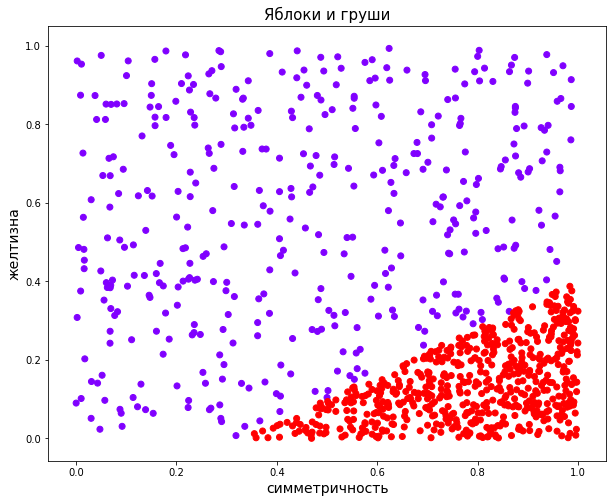

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

**Вопрос:** Какой класс соответствует яблокам (какого они цвета на графике)?

**Ответ:** Красного

Обозначим, что здесь признаки, а что - классы:

In [14]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

**Вывод функции потерь**  
Функция потерь должна убывать и в итоге стать близкой к 0

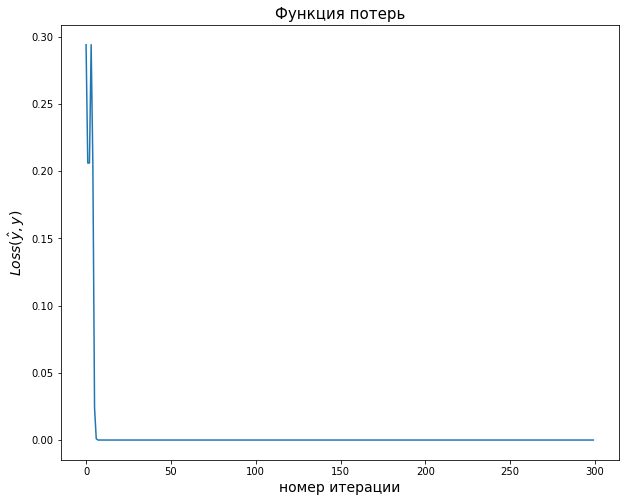

CPU times: user 317 ms, sys: 186 ms, total: 503 ms
Wall time: 284 ms


In [15]:
%%time
perceptron = Perceptron()
losses = perceptron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как перцептрон классифицировал объекты из выборки:

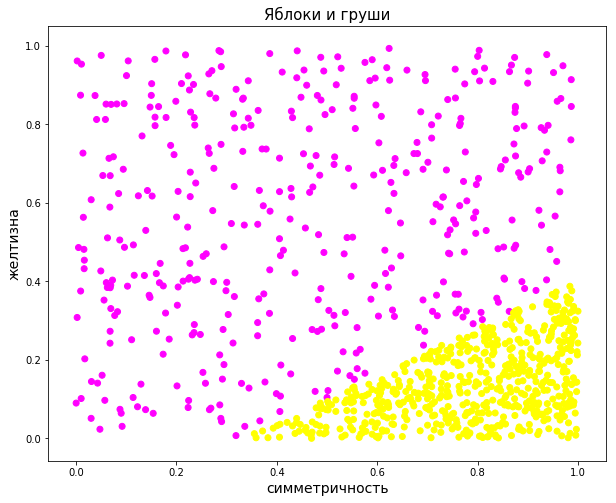

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=perceptron.forward_pass(X).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

<h3 style="text-align: center;"><b>Предсказание пола по голосу</b></h3>

В этой задаче нужно сравнить качество работы Вашего перцептрона и алгоритма из библиотеки `sklearn` на датасете с сайта [Kaggle](https://www.kaggle.com) - [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender). В данном датасете в качестве признаков выступают различные звуковые характеристики голоса, а в качестве классов - пол (мужчина/женщина). Подробнее о самих признаках можно почитать [на странице датасета](https://www.kaggle.com/primaryobjects/voicegender) (на английском). Нашей целью пока что является просто протестировать на этих данных два алгоритма.

**! Обратите внимание на имя функции из sklearn - skPerceptron** (это сделано, чтобы не совпадало с именем Вашего класса)

In [17]:
import pandas as pd
from sklearn.linear_model import Perceptron as skPerceptron
from sklearn.metrics import accuracy_score

In [18]:
data_path = './data/voice.csv'
data = pd.read_csv(data_path)
data['label'] = data['label'].apply(lambda x: 1 if x == 'male' else 0)

In [19]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [20]:
# Чтобы перемешать данные. Изначально там сначала идут все мужчины, потом все женщины
data = data.sample(frac=1)

In [21]:
X_train = data.iloc[:int(len(data)*0.7), :-1]  # матрица объекты-признаки
y_train = data.iloc[:int(len(data)*0.7), -1]  # истинные значения пола (мужчина/женщина)

X_test = data.iloc[int(len(data)*0.7):, :-1]  # матрица объекты-признаки
y_test = data.iloc[int(len(data)*0.7):, -1]  # истинные значения пола (мужчина/женщина)

Тут нужно натренировать Ваш перцептрон и перцептрон из `sklearn` на этих данных:

In [22]:
RANDOM_SEED = 42

perceptron = Perceptron()
perceptron.fit(X_train.values, y_train.values)

sk_perceptron = skPerceptron(random_state=RANDOM_SEED)
sk_perceptron.fit(X_train.values, y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

Сравним доли правильных ответов (на тестовых данных):

In [23]:
print('Точность (доля правильных ответов, из 100%) моего перцептрона: {:.1f} %'
      .format(accuracy_score(y_test, perceptron.forward_pass(X_test)) * 100))
print('Точность (доля правильных ответов) перцептрона из sklearn: {:.1f} %'
      .format(accuracy_score(y_test, sk_perceptron.predict(X_test)) * 100))

Точность (доля правильных ответов, из 100%) моего перцептрона: 49.6 %
Точность (доля правильных ответов) перцептрона из sklearn: 67.0 %


А теперь побольше итераций:

In [24]:
RANDOM_SEED = 42

perceptron = Perceptron()
perceptron.fit(X_train.values, y_train.values, num_epochs=20000)

sk_perceptron = skPerceptron(n_iter=3000, random_state=RANDOM_SEED)
sk_perceptron.fit(X_train.values, y_train.values)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=3000, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

Сравним доли правильных ответов (на тестовых данных):

In [25]:
print('Точность (доля правильных ответов, из 100%) моего перцептрона: {:.1f} %'
      .format(accuracy_score(y_test, perceptron.forward_pass(X_test)) * 100))
print('Точность (доля правильных ответов) перцептрона из sklearn: {:.1f} %'
      .format(accuracy_score(y_test, sk_perceptron.predict(X_test)) * 100))

Точность (доля правильных ответов, из 100%) моего перцептрона: 50.4 %
Точность (доля правильных ответов) перцептрона из sklearn: 86.1 %


**ОБЯЗАТЕЛЬНЫЙ вопрос:** Хорошее ли качество показывает перцептрон? Как Вы думаете, почему? Можете писать любые мысли на этот счёт.

**Ответ:** Не очень хорошее качество, когда мало итераций, и уже лучше, когда итераций больше. Однако нужно быть осторожным -- количество итераций не всегда приводит к улучшения, посколькьу: 
* есть другие гиперпараметры (например, гиперпараметр регуляризации), за которыми нужно следить, чтобы не было переобучения/расхождения в оптимизации
* оптимизация всё же стохастическая, то есть случайная, и, если посмотреть на график лосса (у перцептрона из sklearn) то он будет не гладкий, как у нас, а очень "шумный", то есть лос скачет то вверх, то вниз, поэтмоу обычно при обучении люди стараются выводить график лосса и брать итоговые веса с той итерации, на которой лосс был минимален (об этом ещё будет в нашем курсе)

<h2 style="text-align: center;"><b>Нейрон с различными функциями активации</b></h2>

Напомним, что сигмоидальная функция (сигмоида) выглядит так:  
    
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

В данном случае мы снова решаем задачу бинарной классификации (2 класса: 1 или 0), но здесь уже будет другая функция активации:
$$Loss(\hat{y}, y) = \frac{1}{2n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2 = \frac{1}{2n}\sum_{i=1}^{n} (\sigma(w \cdot X_i) - y_i)^2$$  
Здесь $w \cdot X_i$ - скалярное произведение, а $\sigma(w \cdot X_i) =\frac{1}{1+e^{-w \cdot X_i}} $ - сигмоида.  

**Примечание:** В формуле предполагается, что $b$ - свободный член - является частью вектора весов: $w_0$. Тогда, если к $X$ приписать слева единичный столбец, в скалярном произведении $b$ будет именно как свободный член. При реализации класса $b$ нужно считать отдельно (чтобы было нагляднее).

Формула для обновления весов при градиентном спуске будет такая:

$$ \frac{\partial Loss}{\partial w} = \frac{1}{n} X^T (\sigma(w \cdot X) - y)\sigma(w \cdot X)(1 - \sigma(w \cdot X))$$

Реализуйте сигмоиду и её производную:

In [26]:
def sigmoid(x):
    """Сигмоидальная функция"""
    return 1 / (1 + np.exp(-x))

In [27]:
def sigmoid_derivative(x):
    """Производная сигмоиды"""
    return sigmoid(x) * (1 - sigmoid(x))

Теперь нужно написать нейрон с сигмоидной функцией активации. Здесь всё очень похоже на перцептрон, но будут по-другому обновляться веса и другая функция активации:

In [28]:
class Neuron:
    def __init__(self, w=None, b=0):
        """
        :param: w -- вектор весов
        :param: b -- смещение
        """
        # Пока что мы не знаем размер матрицы X, а значит не знаем, сколько будет весов
        self.w = w
        self.b = b

    def activate(self, x):
        return sigmoid(x)
        
    def forward_pass(self, X):
        """
        Рассчитывает ответ перцептрона при предъявлении набора объектов
        :param: X -- матрица примеров размера (n, m), каждая строка - отдельный объект
        :return: вектор размера (n, 1) из нулей и единиц с ответами перцептрона 
        """
        n = X.shape[0]
        y_pred = np.zeros((n, 1))  # y_pred == y_predicted - предсказанные классы
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1, 1)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.1):
        """
        Обновляет значения весов перцептрона в соответствии с этим объектом
        :param: X -- матрица входов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                learning_rate - "скорость обучения" (символ alpha в формулах выше)
        В этом методе ничего возвращать не нужно, только правильно поменять веса
        с помощью градиентного спуска.
        """
        n = len(y)
        y = np.array(y).reshape(-1, 1)
        sigma = self.activate(X @ self.w + self.b)
        self.w = self.w - learning_rate * (X.T @ ((sigma - y) * sigma * (1 - sigma))) / n
        self.b = self.b - learning_rate * np.mean((sigma - y) * sigma * (1 - sigma))
    
    def fit(self, X, y, num_epochs=5000):
        """
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n, m)
                y -- вектор правильных ответов размера (n, 1)
                num_epochs -- количество итераций обучения
        :return: Loss_values -- вектор значений функции потерь
        """
        self.w = np.zeros((X.shape[1], 1))  # столбец (m, 1)
        self.b = 0  # смещение
        Loss_values = []  # значения функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            # предсказания с текущими весами
            y_pred = self.forward_pass(X)
            # считаем функцию потерь с текущими весами
            Loss_values.append(Loss(y_pred, y))
            # обновляем веса в соответсвие с тем, где ошиблись раньше
            self.backward_pass(X, y, y_pred)
        
        return Loss_values

**Тестирование нейрона**

Здесь Вам нужно самим протестировать новый нейрон **на тех же данных** по аналогии с тем, как это было проделано с перцептроном  (можете смело копировать код, только будьте осторожны - кое-что в нём всё же скорее всего придётся поправить).
В итоге нужно вывести: 
* график, на котором будет показано, как изменяется функция потерь $Loss$ в зависимости от числа итераций обучения
* график с раскраской выборки сигмоидальным нейроном

**Проверка forward_pass()**

In [29]:
w = np.array([1., 2.]).reshape(2, 1)
b = 2.
X = np.array([[1., 3.],
              [2., 4.],
              [-1., -3.2]])

neuron = Neuron(w, b)
y_pred = neuron.forward_pass(X)
print ("y_pred = " + str(y_pred))

y_pred = [[0.99987661]
 [0.99999386]
 [0.00449627]]


|Должно быть||
|------|-------|
|**y_pred**|[0.99987661, 0.99999386,0.00449627]|

**Проверка backward_pass()**

In [30]:
y = np.array([1, 0, 1]).reshape(3, 1)

In [31]:
neuron.backward_pass(X, y, y_pred)

print ("w = " + str(neuron.w))
print ("b = " + str(neuron.b))

w = [[0.99985106]
 [1.99952388]]
b = 2.000148326741343


|Должно быть||
|------|-------|
|**w**|[0.99985106, 1.99952388]|
|**b**|2.000148326741343|

Посмотрим, как меняется функция потерь в течение процесса обучения на реальных данных - датасет "Яблоки и Груши":

In [32]:
data = pd.read_csv("./data/apples_pears.csv")

In [33]:
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


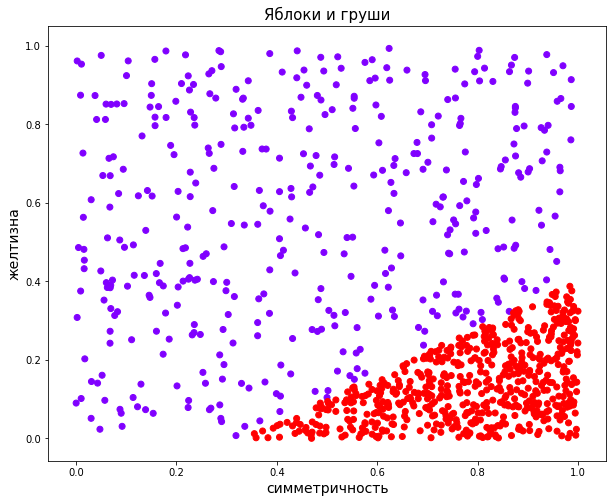

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Обозначим, что здесь признаки, а что - классы:

In [35]:
X = data.iloc[:,:2].values  # матрица объекты-признаки
y = data['target'].values.reshape((-1, 1))  # классы (столбец из нулей и единиц)

**Вывод функции потерь**  
Функция потерь должна убывать и в итоге стать близкой к 0

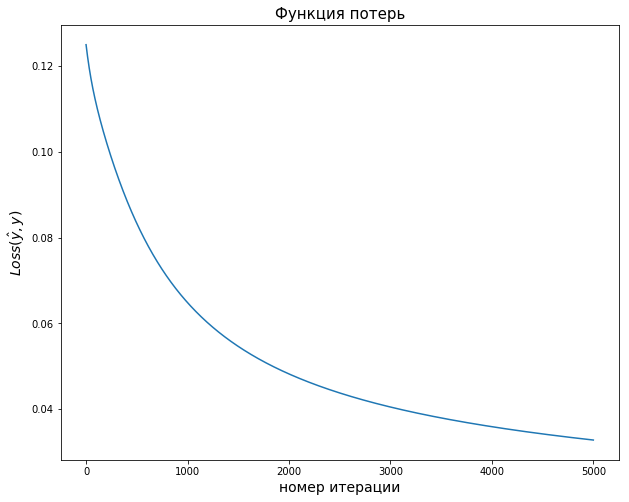

CPU times: user 650 ms, sys: 175 ms, total: 825 ms
Wall time: 590 ms


In [36]:
%%time

neuron = Neuron()
Loss_values = neuron.fit(X, y)

plt.figure(figsize=(10, 8))
plt.plot(Loss_values)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('номер итерации', fontsize=14)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=14)
plt.show()

Посмотрим, как перцептрон классифицировал объекты из выборки:

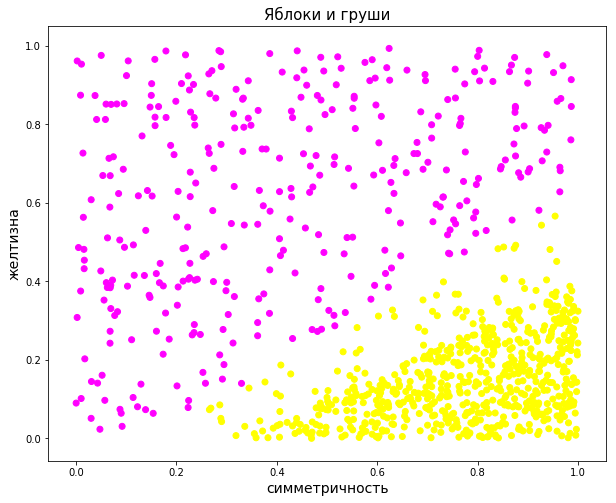

In [37]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

На самом деле то, что вы здесь наблюдаете (плохое качетсво разделения) -- последствие **затухающих градиентов (vanishing gradients)**. Мы позже ещё поговорим об этом (то есть о том, почему это происходит в данном случае).

Попробуем увеличить количество итераций градиентного спуска (50k итераций):

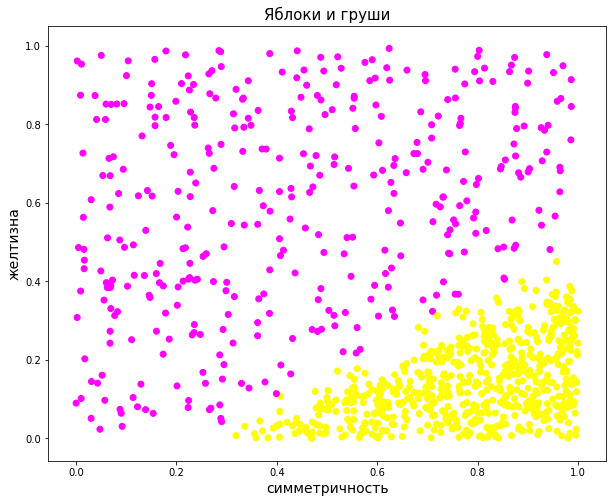

CPU times: user 4.58 s, sys: 199 ms, total: 4.78 s
Wall time: 4.47 s


In [38]:
%%time

neuron = Neuron()
Loss_values = neuron.fit(X, y, num_epochs=50000)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=np.array(neuron.forward_pass(X) > 0.5).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show();

Что ж, стало лучше. Градиенты "текут" медленно, но верно.

---

В домашнем задании вам нужно будет реализовать класс Neuron() с другими функциями активации: ReLu, LeakyReLU, ELU, SeLU, Swish (какими-то из них).

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

0). Обязательно прочитайте (если вам повзоляет английский) эту статью от Стэнфорда: http://cs231n.github.io/neural-networks-1/

1). Хорошая статья про функции активации: https://www.jeremyjordan.me/neural-networks-activation-functions/

2). [Видео от Siraj Raval](https://www.youtube.com/watch?v=-7scQpJT7uo)

3). Современная статья про функции активации. Теперь на хайпе активация **$swish(x) = x\sigma (\beta x)$:** https://arxiv.org/pdf/1710.05941.pdf (кстати, при её поиске в некоторой степени использовался neural architecture search)

4). **SeLU** имеет очень интересные, доказанные с помощью теории вероятностей свойства: https://arxiv.org/pdf/1706.02515.pdf (да, в этой статье 102 страницы)